# NBA FREE THROW ANALYSIS

## Key Motivators: 
Goal is to assess what is the optimal height and wingspan that correlates to a higher Free Throw Percentage.


## Project Goal:
To find whether taller than average NBA players are capable of shooting a high Free Throw percentage?


Hypothesis: I believe that Taller NBA players tend to be bad free throw shooters
-	This can be due to their inexperience in shooting many 3point shooters and only having the ability to post up or shoot field goals
o	Can find this number by subtracting the number of 3PT/FT from FG
o	Some other aspects we can look at into why this is true as we can compare to other player positions and see how training regimens differ (Ex. Using 
o	Can use a comparison between shooting guards and centers to see which one has a higher FT% to prove claim (Can use data to display height of all shooting guards and centers)

Null Hypothesis (disproves claim):
-	Other hand Taller NBA shooters may have better experience in shooting FT as taller men tend to get fouled a lot due to tall centers placed in the paint. This could also result in them having a higher free throw percentage


-	There is also the chance that there may be no correlation between height/wingspan in relation to FT% and can be just due primarily to skill.
o	Some other factors to look at are how height and position 

### Modules

In [1]:
#Import Neccessary Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

### Read In CSVs

In [2]:
#Read in 'Combine Data' and 'Raw NBA Data' CSV's

raw_combine_data=pd.read_csv('Resources/raw_combine_data.csv')
raw_nba_data=pd.read_csv('Resources/raw_nba_data.csv')

### Finding Duplicates

In [3]:
#Finding duplicates and analyzing reason for duplicates.

nba_duplicates=raw_nba_data[raw_nba_data.duplicated(['PLAYER'])]
combine_duplicates=raw_combine_data[raw_combine_data.duplicated(['PLAYER'])]

### Drop Duplicates from Dataframes

In [4]:
#Dropped duplicates and kept original rows

dropped_combine_data=raw_combine_data.drop_duplicates(subset='PLAYER',keep='first')
dropped_nba_data=raw_nba_data.drop_duplicates(subset='PLAYER',keep='first')

### Merge DataFrames

In [5]:
merged_data_df=dropped_combine_data.merge(dropped_nba_data, on='PLAYER')

### Drop Rows w/ Missing Wingspan Data

In [6]:
merged_data_df=merged_data_df.dropna(subset=['WINGSPAN'])
merged_data_df=merged_data_df.dropna(subset=['HEIGHT\xa0W/O\xa0SHOES'])

merged_data_df = merged_data_df[merged_data_df['FTA'] > 10]
merged_data_df = merged_data_df[merged_data_df['2PA'] > 10]
merged_data_df = merged_data_df[merged_data_df['3PA'] > 10]

merged_data_df

,PLAYER,POS,BODY FAT %,HAND LENGTH (INCHES),HAND WIDTH (INCHES),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,5.05%,8.75,10.5,6' 7.5'',6' 8.75'',8' 9'',220.1,6' 11.75'',...,0.675,103,338,441,215,50,36,94,116,833
1,Aaron Holiday,PG,6.40%,8.75,8.5,5' 11.75'',6' 0.75'',8' 1'',187,6' 7.5'',...,0.861,21,111,132,193,45,13,75,102,546
2,Admiral Schofield,SF,6.80%,8.75,9,6' 4'',6' 5.25'',8' 6.5'',240.6,6' 9.75'',...,0.692,6,28,34,14,8,3,7,41,83
3,Al Horford,PF,9.10%,-,-,6' 8'',6' 9.75'',8' 11'',246,7' 0.75'',...,0.753,92,320,412,244,52,55,65,128,722
4,Alec Burks,SG,5.10%,9,8.25,6' 5'',6' 6'',8' 7.5'',192.6,6' 10'',...,0.896,43,219,262,171,58,17,85,120,891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Victor Oladipo,SG,6.55%,8.75,9.25,6' 3.25'',6' 4.25'',8' 4.5'',213.2,6' 9.25'',...,0.780,7,34,41,39,11,3,28,21,179
298,Wayne Ellington,SG,5.50%,-,-,6' 4.25'',6' 5.25'',8' 4'',202.4,6' 6.5'',...,0.846,4,61,65,44,13,4,18,41,183
299,Wesley Iwundu,SG-SF,4.00%,8.75,9.5,6' 5.5'',6' 6.75'',8' 9.5'',193.4,7' 1'',...,0.816,23,90,113,46,25,11,18,62,237
300,Will Barton,SG-SF,4.10%,9,9.5,6' 5'',6' 6'',8' 6.5'',174.4,6' 9.75'',...,0.767,76,289,365,212,61,29,88,121,874


In [7]:
merged_data_df.reset_index(inplace=True)
merged_data_df.drop(axis=1, labels='index', inplace=True)

### Export as CSV

In [8]:
merged_data_df.to_csv("Resources/merged_data.csv", index=False)

In [9]:
wingspan = []
wingspan_convert=[]

wingspan = []
wingspan_convert = []
wingspan = merged_data_df['WINGSPAN']
wingspan_list = wingspan.tolist()
for wingspan in wingspan_list:
    wingspan_cleaned = wingspan.strip("'").split("'")
    wingspan_convert.append((float(wingspan_cleaned[0])*12)+float(wingspan_cleaned[1]))

In [10]:
merged_data_df['WINGSPAN']=wingspan_convert
merged_data_df.head(1)

,PLAYER,POS,BODY FAT %,HAND LENGTH (INCHES),HAND WIDTH (INCHES),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,5.05%,8.75,10.5,6' 7.5'',6' 8.75'',8' 9'',220.1,83.75,...,0.675,103,338,441,215,50,36,94,116,833


### Height Data

In [13]:
#Converting the Height Data from Feet and inches to feet.


#Created empty list to store height in inches after looping through 'original_height' which is in feet and inches
height_inches=[]

original_height = merged_data_df['HEIGHT\xa0W/O\xa0SHOES']
original_height_list = original_height.tolist()

for height in original_height_list:
    height_cleaned = str(height).strip("'").split("'")
    height_inches.append(float(height_cleaned[0]) * 12 + float(height_cleaned[1]))

### Height Data and NBA Stats

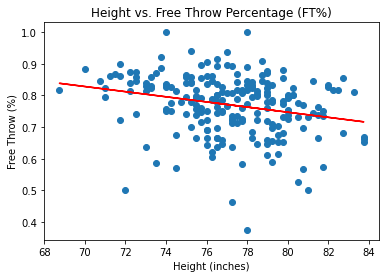

In [41]:
#Graphing:
#Height vs FT%

(correlation_coefficient) = st.pearsonr(height_inches, merged_data_df['FT%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(height_inches, merged_data_df['FT%'])

#Slope formula 'y=mx+b'
y = slope * np.array(height_inches) + intercept

plt.scatter(x = height_inches, y = merged_data_df['FT%'])
plt.xlabel('Height (inches)')
plt.ylabel('Free Throw (%)')
plt.title('Height vs. Free Throw Percentage (FT%)')

plt.plot(height_inches, y, color = 'red')
plt.show()

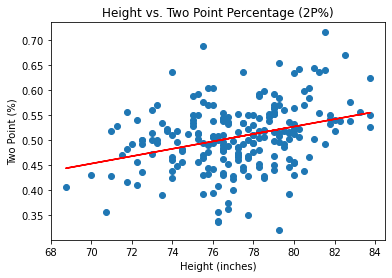

In [50]:
#Height vs 2P%

(correlation_coefficient) = st.pearsonr(height_inches, merged_data_df['2P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(height_inches, merged_data_df['2P%'])

#Slope formula 'y=mx+b'
y = slope * np.array(height_inches) + intercept

plt.scatter(x = height_inches, y = merged_data_df['2P%'])
plt.xlabel('Height (inches)')
plt.ylabel('Two Point (%)')
plt.title('Height vs. Two Point Percentage (2P%)')

y = slope * np.array(height_inches) + intercept

plt.plot(height_inches, y, color = 'red')
plt.show()

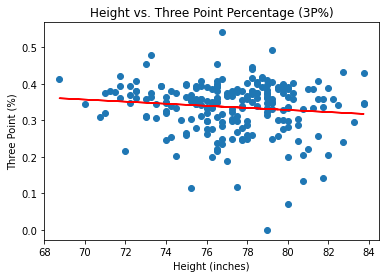

In [51]:
#Height vs 3P%

(correlation_coefficient) = st.pearsonr(height_inches, merged_data_df['3P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(height_inches, merged_data_df['3P%'])

#Slope formula 'y=mx+b'
y = slope * np.array(height_inches) + intercept

plt.scatter(x = height_inches, y = merged_data_df['3P%'])
plt.xlabel('Height (inches)')
plt.ylabel('Three Point (%)')
plt.title('Height vs. Three Point Percentage (3P%)')

y = slope * np.array(height_inches) + intercept
plt.plot(height_inches, y, color = 'red')

plt.show()